In [267]:
import pandas as pd
import matplotlib.pyplot as plt

In [268]:
df = pd.read_csv("evp.csv")

In [269]:
df.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [270]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [271]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 463
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

<h1>How many unique electric vehicle (EV) models are available in the dataset?

In [272]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,220222.000000,220225.000000,220225.000000,220225.000000,219762.000000,2.202250e+05,2.202220e+05
mean,98176.179355,2021.194242,48.724423,852.456874,28.907909,2.315541e+08,5.298061e+10
std,2534.666722,2.981490,85.874160,7469.168138,14.911386,6.983360e+07,1.524348e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,1.980609e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.448443e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.659792e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [273]:
df["Electric Vehicle Type"].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [274]:
df["Model"].unique()

array(['MODEL 3', 'X5', 'VOLT', 'ID.4', 'EV9', 'NIRO', 'R1T', 'MODEL X',
       'PRIUS PRIME', 'LEAF', 'I3', 'WRANGLER', 'MODEL Y', 'BZ4X',
       'MODEL S', '500', 'C-MAX', 'X3', 'XC90', 'PACIFICA', 'E-TRON',
       'NX', '330E', 'SORENTO', 'XC60', 'CYBERTRUCK', 'TONALE',
       'GRAND CHEROKEE', 'RAV4 PRIME', 'I-PACE', 'A3', 'FUSION',
       'BOLT EV', 'EV6', 'CAYENNE', 'PS2', 'HARDTOP', 'CX-90', 'HORNET',
       'COUNTRYMAN', 'I4', 'CLARITY', 'CX-70', 'I8', 'Q5', 'RX', '530E',
       'Q5 E', 'SOUL', 'IONIQ 6', 'TUCSON', 'XM', 'SPARK', 'V60',
       'PRIUS PLUG-IN', 'EQE-CLASS SUV', 'LYRIQ', 'EQS-CLASS SEDAN',
       'IONIQ 5', 'F-150', 'XC40', 'ROADSTER', 'TAYCAN', 'MUSTANG MACH-E',
       'KONA ELECTRIC', 'ARIYA', 'EQB-CLASS', 'BOLT EUV', 'SOLTERRA',
       'IONIQ', 'R1S', 'E-TRON GT', 'EQUINOX EV', 'SANTA FE', 'BLAZER EV',
       'EQS-CLASS SUV', 'IX', 'GLE-CLASS', 'B-CLASS', 'E-GOLF', 'RZ',
       'FOCUS', 'Q8', 'AVIATOR', 'PROLOGUE', 'TRANSIT', 'GLC-CLASS',
       'EQE-CLASS SED

In [275]:
df["Model"].nunique()

159

<font color="blue"><h1>There are 159 Electric Vehicle Models in this data set

<h1>Which cities and counties have the highest concentration of electric vehicles?

In [276]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

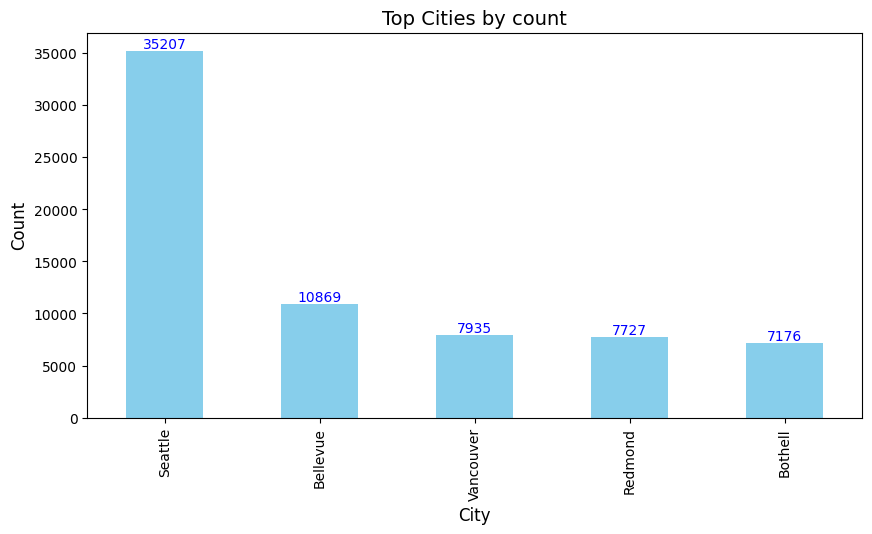

In [277]:
top_cities = df["City"].value_counts().head()

plt.figure(figsize=(10, 5))
bars = top_cities.plot(kind='bar', color='skyblue')

# Adding data labels
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # x-coordinate
             bar.get_height() - 0.1 if bar.get_height() > 0 else 0.1,  # y-coordinate
             f'{int(bar.get_height())}',  # Label text
             ha='center', va='bottom', fontsize=10, color='blue')

# bars.patches : Contains each bar object in plot
# plt.text : adds text to the plot at specified coordinates.
# bar.get_x() : retrievs the x-coordinates (start) of the bar.
# bar.get_width() : Width of the bar
# bar.get_x() + bar.get_width() / 2 : Calculates the center of the bar for placing the label horizontally
# bar.height() : retrieve the height of bar, which represent actual count
# The general form of a ternary conditional statement in Python is: 
# value_if_true if condition else value_if_false
# bar.get_height() - 0.1 if bar.get_height() > 0 else 0.1
# bar.get_height() > 0 : checks height of bar is positive
# if height is positive then 
# bar.get_height() - 0.1 - Places the label slightly below the top of the bar (subtracting 0.1 ensures some space)
# if height is negetive or 0
# Positions the label slightly above the baseline of the bar.

plt.title("Top Cities by count", fontsize=14)
plt.xlabel("City",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

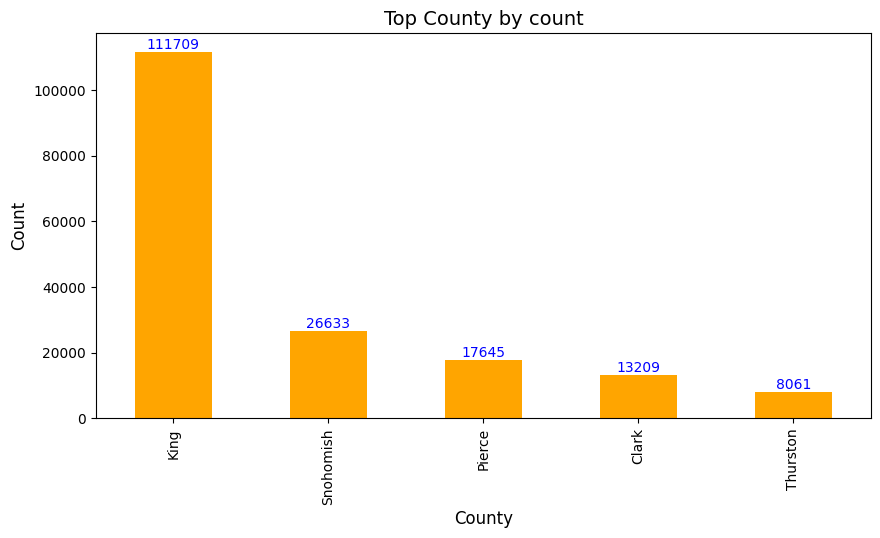

In [278]:
top_county = df["County"].value_counts().head()
plt.figure(figsize=(10, 5))
bars = top_county.plot(kind='bar', color='orange')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, # x coordinate
             bar.get_height() - 0.1 if bar.get_height() > 0 else 0.1, # y coordinate
             f'{int(bar.get_height())}', # label text
             ha="center", va="bottom", fontsize = 10, color="blue")

plt.title("Top County by count", fontsize=14)
plt.xlabel("County",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

<h1><Font color="blue">Cities and Counties with Most EVs <br> Top City - Seattle - 35 K <br> Top County - King - 1 Lakhs </h1>

<h1>How does the distribution of electric vehicles vary across different states?</h1>

In [279]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [280]:
df["State"].value_counts(normalize=True) * 100

State
WA    99.789760
CA     0.050403
VA     0.027245
MD     0.016801
TX     0.013168
NC     0.009082
CO     0.007719
FL     0.005903
GA     0.005903
CT     0.004541
IL     0.004541
AZ     0.004087
NY     0.004087
MA     0.003633
NJ     0.003633
AL     0.003633
OR     0.003633
NV     0.003633
SC     0.003179
MI     0.002724
MO     0.002724
PA     0.002724
HI     0.002270
KS     0.002270
ID     0.002270
KY     0.002270
DC     0.001816
OH     0.001816
RI     0.001816
TN     0.001362
NM     0.000908
DE     0.000908
UT     0.000908
ME     0.000908
NE     0.000908
IN     0.000908
AR     0.000908
MN     0.000454
OK     0.000454
NS     0.000454
AE     0.000454
WI     0.000454
LA     0.000454
WY     0.000454
BC     0.000454
MS     0.000454
AK     0.000454
NH     0.000454
Name: proportion, dtype: float64

<h1><b><font color="blue">WA has 2 Lakhs Electric Vehicle, about 99.79% of Total Vehicles</h1>

<h1>Which electric utility companies serve the most EV owners?

In [281]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

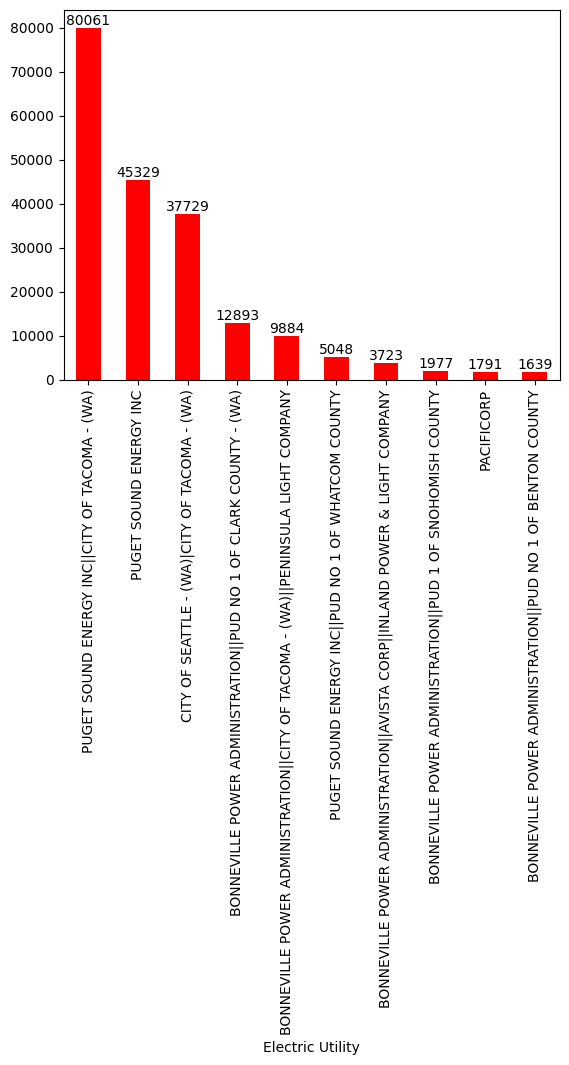

In [282]:
top_electric_vehicle = df["Electric Utility"].value_counts().head(10)
bars = top_electric_vehicle.plot(kind="bar", color="red")

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
    bar.get_height() - 0.1 if bar.get_height() > 0 else 0.1,
    f'{int(bar.get_height())}', ha="center", va="bottom", fontsize=10)
plt.show()

In [283]:
df["Electric Utility"].value_counts(normalize=True) * 100

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                 36.354678
PUGET SOUND ENERGY INC                                                                                        20.583320
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                  17.132257
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                               5.854547
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                4.488198
                                                                                                                ...    
CITY OF SEATTLE - (WA)                                                                                         0.000908
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF JEFFERSON COUNTY                                                  0.000908
BONNEVILLE POWER ADMINI

<h1><font color="blue">PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA) has most EV owners (about 80K - 36% of Total Companies)</h1>

<h1> How many EVs are located in each Census Tract?

In [284]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [285]:
df["2020 Census Tract"].value_counts().head()

2020 Census Tract
5.303303e+10    2631
5.303303e+10    1171
5.303303e+10     931
5.303301e+10     864
5.306701e+10     820
Name: count, dtype: int64

In [286]:
df["2020 Census Tract"].value_counts()

2020 Census Tract
5.303303e+10    2631
5.303303e+10    1171
5.303303e+10     931
5.303301e+10     864
5.306701e+10     820
                ... 
6.073001e+09       1
2.403380e+10       1
3.200300e+10       1
2.116397e+10       1
6.073011e+09       1
Name: count, Length: 2184, dtype: int64

<h1><font color="blue">5.303303e+10 have most EVs

<h1>Which vehicle make has the highest average electric range?</h1>

In [287]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [288]:
df.groupby("Make")["Electric Range"].mean().sort_values(ascending=False).head()

Make
JAGUAR                  199.296610
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
CHEVROLET                86.357826
FIAT                     80.165000
Name: Electric Range, dtype: float64

<h1><font color="blue">JAGUAR gives highest avg electric range - 199 Km/hr</h1>

<h1>What is the most common type of electric vehicle?

In [289]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [290]:
df["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            174212
Plug-in Hybrid Electric Vehicle (PHEV)     46013
Name: count, dtype: int64

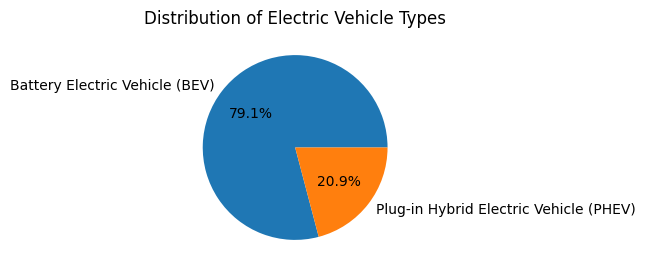

In [291]:
et_type = df["Electric Vehicle Type"].value_counts(normalize=True) * 100
plt.figure(figsize=(3,3))
plt.pie(et_type, autopct='%1.1f%%',  labels=et_type.index)
plt.title("Distribution of Electric Vehicle Types")
plt.show()

<h1><font color="blue">Battery Electric Vehicle (BEV) is most commonly used  (about 79%)</h1>

<h1>Top Manufacturers of CAFV-Eligible Vehicles

In [292]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [293]:
top_cafv_makes = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Clean Alternative Fuel Vehicle Eligible"]["Make"].value_counts().head()

In [294]:
top_cafv_makes

Make
TESLA        25304
NISSAN       10414
CHEVROLET     9714
BMW           4175
TOYOTA        3977
Name: count, dtype: int64

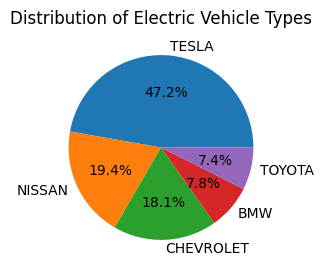

In [295]:
plt.figure(figsize=(3,3))
plt.pie(top_cafv_makes, autopct='%1.1f%%',  labels=top_cafv_makes.index)
plt.title("Distribution of Electric Vehicle Types")
plt.show()

<h1><Font color="blue">Tesla is Top Manufacturer of CAFV-Eligible Vehicles</h1>

<h1>What is the average Base MSRP of electric vehicles by model year?</h1>

<p>Base MSRP stands for <b>Manufacturer's Suggested Retail Price</b> It is the starting price of a vehicle (or product) as suggested by the manufacturer before adding optional features, taxes, fees, and other costs.</p>

In [296]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

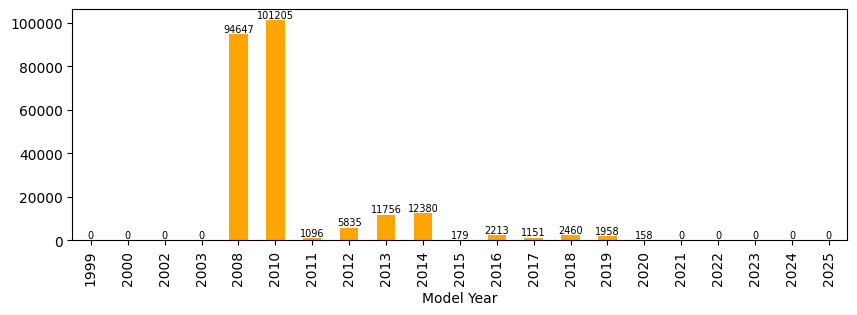

In [297]:
avg_base_msrp = df.groupby("Model Year")["Base MSRP"].mean().round(2)
plt.figure(figsize=(10,3))
bars = avg_base_msrp.plot(kind="bar", color="orange")
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() - 0.1 if bar.get_height() > 0 else 0.1,
             f"{int(bar.get_height())}",
             ha="center", va="bottom", fontsize=7)
plt.show()

<h3><font color="blue">In 2008 (94,647) and 2010 (1,01,205) the base MSRP is outlier

In [298]:
df[df['Model Year'].isin([2008,2010])][['Model Year', 'Base MSRP',"Make"]]

,Model Year,Base MSRP,Make
311,2010,110950,TESLA
2782,2008,98950,TESLA
11627,2010,110950,TESLA
11678,2008,98950,TESLA
15084,2008,98950,TESLA
16296,2008,98950,TESLA
16529,2008,98950,TESLA
23506,2010,110950,TESLA
24171,2010,110950,TESLA
32894,2010,110950,TESLA


In [299]:
df[df["Make"].isin(["TESLA"])]["Model Year"]

0         2020
3         2018
7         2020
11        2018
15        2020
          ... 
220217    2024
220219    2023
220221    2018
220222    2019
220224    2018
Name: Model Year, Length: 95378, dtype: int64

<h1><font color="blue">In 2008 and 2010 Most of ev manufactured TESLA, that why base MSRP is large</h1>

<h1>How does Base MSRP correlate with Electric Range?</h1>

In [300]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [301]:
df[["Base MSRP", "Electric Range"]].corr()

,Base MSRP,Electric Range
Base MSRP,1.000000,0.115324
Electric Range,0.115324,1.000000


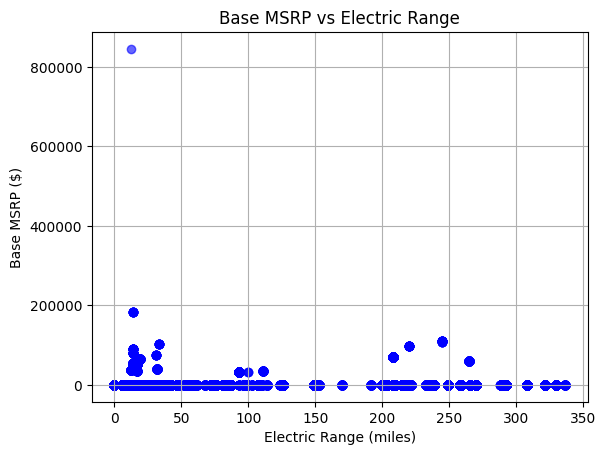

In [302]:
plt.scatter(df['Electric Range'], df['Base MSRP'], alpha=0.6, color='blue')
plt.title('Base MSRP vs Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.grid()
plt.show()

In [303]:
df['Price Range'] = pd.cut(df['Base MSRP'], bins=[0, 40000, 80000, 120000, 200000], labels=['Low', 'Mid', 'High', 'Luxury'])
df.groupby('Price Range', observed=False)['Electric Range'].mean()

Price Range
Low        67.561346
Mid       143.715367
High      113.362832
Luxury     14.000000
Name: Electric Range, dtype: float64

In [304]:
filtered_df = df[df['Base MSRP'] < 120000]
filtered_df[['Base MSRP', 'Electric Range']].corr()

,Base MSRP,Electric Range
Base MSRP,1.000000,0.121521
Electric Range,0.121521,1.000000


<h3><font color="blue">The value 0.115 indicates a very weak positive correlation. <br>The electric range does not heavily influence the base MSRP.<br>Some manufacturers may price vehicles based on brand perception or additional features rather than the electric range alone.</h1>

<h1>Is there a trend between newer model years and CAFV eligibility?</h1>

In [305]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Price Range'],
      dtype='object')

In [306]:
cafv_trend = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']
cafv_count_by_year = cafv_trend['Model Year'].value_counts().sort_index()
cafv_count_by_year

Model Year
1999        2
2000        7
2002        2
2003        1
2008       22
2010       24
2011      696
2012     1162
2013     3472
2014     2680
2015     4038
2016     4106
2017     6068
2018    11955
2019     9265
2020    10764
2021     2363
2022     2529
2023     5063
2024     6010
2025      787
Name: count, dtype: int64

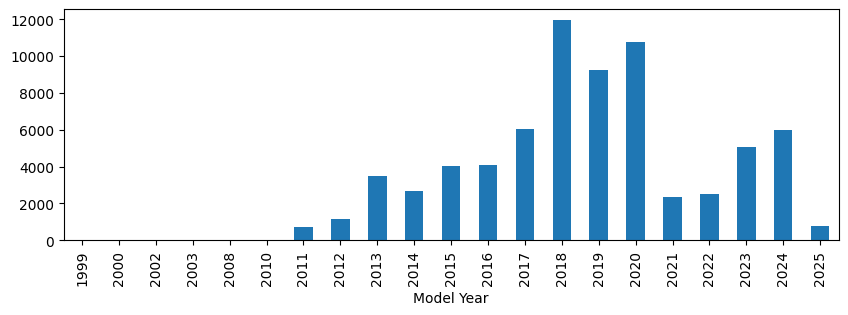

In [307]:
plt.figure(figsize=(10,3))
cafv_count_by_year.plot(kind="bar")
plt.show()

<h1><font color="blue">2018 and 2020 Model year most vehicles eligible for CAFV</h1>

<h1>Which counties have the highest average electric range for vehicles?

In [308]:
df.groupby('County')['Electric Range'].mean().sort_values(ascending=False).head(10)

County
Chatham       322.0
St. Louis     322.0
Denton        322.0
Rockingham    308.0
Nassau        293.0
Palm Beach    291.0
Travis        265.0
Chesapeake    259.0
Arlington     220.0
Lee           220.0
Name: Electric Range, dtype: float64

<h1><font color="blue">Highest average electric range make- Chatham, St. Louis, Denton (322)</h1>

<h1>How has the diversity of makes and models evolved over time?

In [319]:
df.groupby("Model Year")["Make"].nunique()

Model Year
1999     1
2000     1
2002     1
2003     1
2008     1
2010     2
2011     5
2012     7
2013     8
2014    13
2015    12
2016    16
2017    16
2018    19
2019    21
2020    19
2021    21
2022    25
2023    32
2024    41
2025    22
Name: Make, dtype: int64

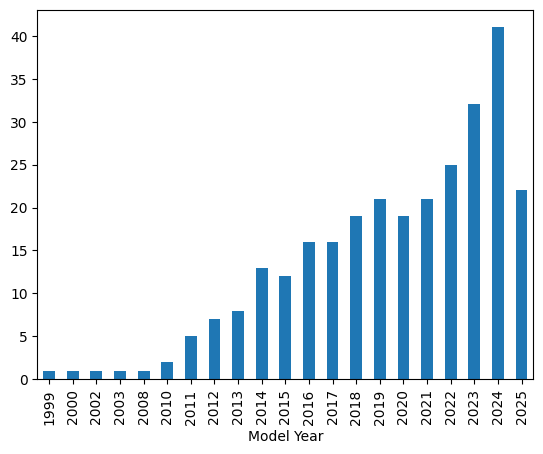

In [320]:
diverity_over_time = df.groupby("Model Year")["Make"].nunique()
diverity_over_time.plot(kind="bar")
plt.show()

In [323]:
df.groupby("Model Year")["Make"].apply(set)

Model Year
1999                                               {FORD}
2000                                               {FORD}
2002                                             {TOYOTA}
2003                                             {TOYOTA}
2008                                              {TESLA}
2010                        {TESLA, WHEEGO ELECTRIC CARS}
2011    {TESLA, CHEVROLET, AZURE DYNAMICS, TH!NK, NISSAN}
2012    {TESLA, CHEVROLET, TOYOTA, MITSUBISHI, FISKER,...
2013    {CHEVROLET, TESLA, HONDA, SMART, TOYOTA, FORD,...
2014    {BMW, CHEVROLET, TESLA, HONDA, CADILLAC, MERCE...
2015    {BMW, TESLA, CHEVROLET, MERCEDES-BENZ, SMART, ...
2016    {BMW, CHEVROLET, TESLA, AUDI, CADILLAC, MERCED...
2017    {BMW, CHEVROLET, TESLA, AUDI, CADILLAC, MERCED...
2018    {TOYOTA, PORSCHE, VOLVO, TESLA, MERCEDES-BENZ,...
2019    {JAGUAR, TOYOTA, PORSCHE, VOLVO, TESLA, MERCED...
2020    {LINCOLN, TOYOTA, JAGUAR, PORSCHE, VOLVO, TESL...
2021    {LINCOLN, TOYOTA, PORSCHE, VOLVO, TESLA, KIA, ...
202

<h1><font color="blue">1999 to 2008 there are 1 manufacturer,  Manufactures are increased from 2010, sharp increase in 2024</h1>

<h1>Which vehicle models qualify most frequently for CAFV eligibility?</h1>

In [324]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Price Range'],
      dtype='object')

In [336]:
eligible = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Clean Alternative Fuel Vehicle Eligible"]

In [339]:
eligible[["Model","Make"]].value_counts().head()

Model    Make     
MODEL 3  TESLA        13723
LEAF     NISSAN       10414
MODEL S  TESLA         5916
VOLT     CHEVROLET     4760
BOLT EV  CHEVROLET     4710
Name: count, dtype: int64

<h1><font color="blue">Model 3 (Tesla) and Leaf (Nissan) has qualify most frequently for CAFV eligiblity</h1>